In [2]:
import pandas as pd
import numpy as np

# Loads in ./data/cohere_2ndbrain_embeddings.csv and ./data/cohere_memory_embeddings.csv

# in form: filename,index,chunk_text,embedding,links
brain_df = pd.read_csv('./sample_data/cohere_2ndbrain_embeddings.csv')
memory_df = pd.read_csv('./sample_data/cohere_memory_embeddings.csv')

memory_embeddings = memory_df['embedding'].apply(lambda x: eval(x))
brain_embeddings = brain_df['embedding'].apply(lambda x: eval(x))

memory_embeddings = np.array([np.array(x) for x in memory_embeddings])
brain_embeddings = np.array([np.array(x) for x in brain_embeddings])

# PCA (5 and 3 dim)

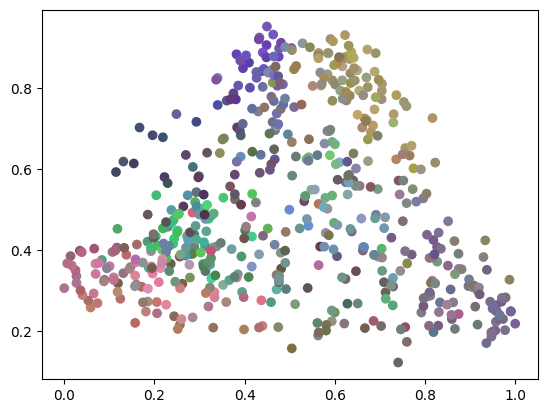

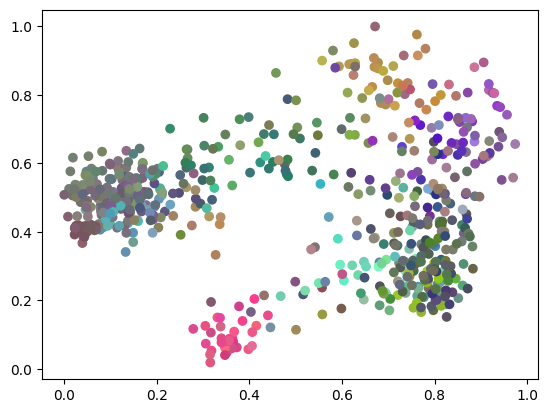

In [3]:
# Runs PCA on memory embeddings and plots them as x, y, r, g, b (4096 dim -> 5 dim), converts color to 0-1 for matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca5 = PCA(n_components=5)
memory_embeddings_pca5 = pca5.fit_transform(memory_embeddings)

# Normalize values to 0-1 using min-max normalization
memory_embeddings_pca5 = (memory_embeddings_pca5 - memory_embeddings_pca5.min()) / (memory_embeddings_pca5.max() - memory_embeddings_pca5.min())

# Plot memory embeddings
plt.scatter(memory_embeddings_pca5[:, 0], memory_embeddings_pca5[:, 1], c=memory_embeddings_pca5[:, 2:5])
plt.show()

# now for brain embeddings
brain_embeddings_pca5 = pca5.fit_transform(brain_embeddings)
brain_embeddings_pca5 = (brain_embeddings_pca5 - brain_embeddings_pca5.min()) / (brain_embeddings_pca5.max() - brain_embeddings_pca5.min())

plt.scatter(brain_embeddings_pca5[:, 0], brain_embeddings_pca5[:, 1], c=brain_embeddings_pca5[:, 2:5])
plt.show()


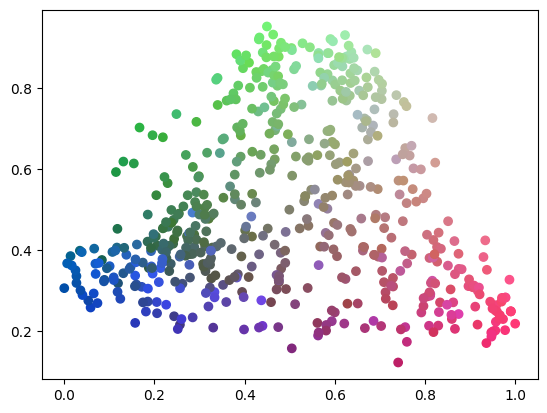

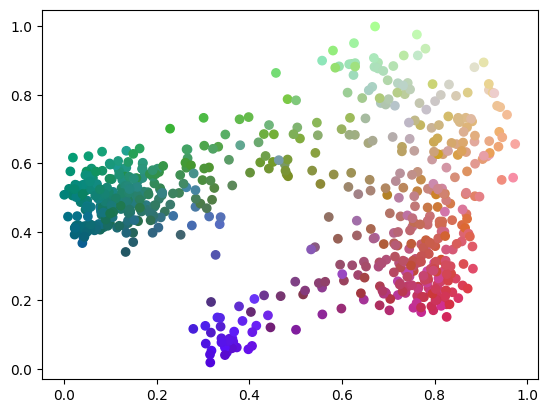

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Plot memory embeddings with UMAP x, y 
plt.scatter(memory_embeddings_pca5[:, 0], memory_embeddings_pca5[:, 1], c=memory_embeddings_pca5[:, 0:3])
plt.show()

# Plot brain embeddings with UMAP x, y
plt.scatter(brain_embeddings_pca5[:, 0], brain_embeddings_pca5[:, 1], c=brain_embeddings_pca5[:, 0:3])
plt.show()

# TSNE + PCA (5 then 3 dim) colors

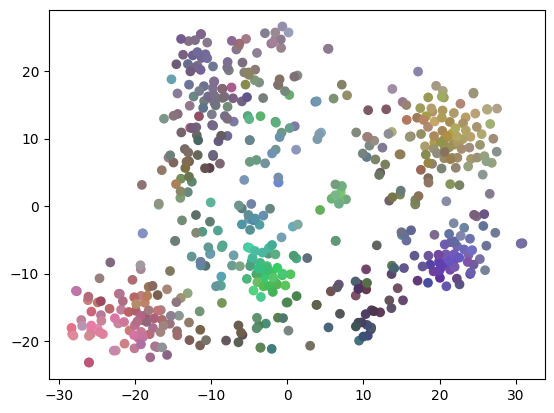

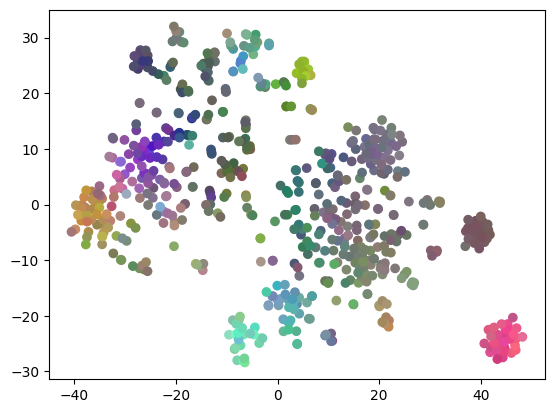

In [5]:
from sklearn.manifold import TSNE

# Runs t-SNE on embeddings to get new XY, then uses PCA RGB already calculated
tsne2 = TSNE(n_components=2)
memory_embeddings_tsne2 = tsne2.fit_transform(memory_embeddings)

plt.scatter(memory_embeddings_tsne2[:, 0], memory_embeddings_tsne2[:, 1], c=memory_embeddings_pca5[:, 2:5])
plt.show()

brain_embeddings_tsne2 = tsne2.fit_transform(brain_embeddings)

plt.scatter(brain_embeddings_tsne2[:, 0], brain_embeddings_tsne2[:, 1], c=brain_embeddings_pca5[:, 2:5])
plt.show()

# UMAP + UMAP Colors 

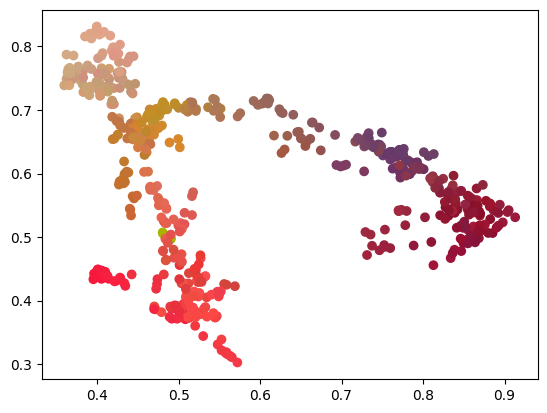

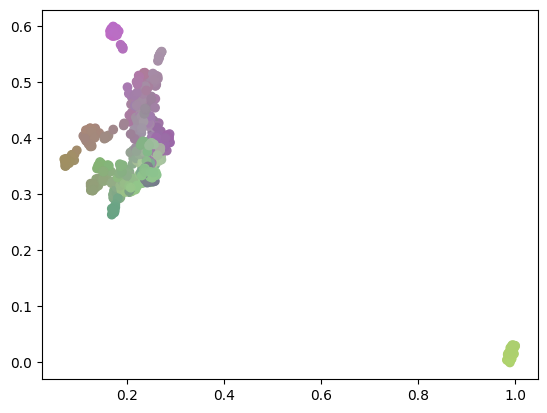

In [8]:
import umap

# UMAP with 5 components
umap_reducer5 = umap.UMAP(n_components=5)
memory_embeddings_umap5 = umap_reducer5.fit_transform(memory_embeddings)

# Normalize to 0-1 using min-max normalization
memory_embeddings_umap5 = (memory_embeddings_umap5 - memory_embeddings_umap5.min()) / (memory_embeddings_umap5.max() - memory_embeddings_umap5.min())

# Plot memory embeddings with UMAP
plt.scatter(memory_embeddings_umap5[:, 0], memory_embeddings_umap5[:, 1], c=memory_embeddings_umap5[:, 2:5])
plt.show()

brain_embeddings_umap5 = umap_reducer5.fit_transform(brain_embeddings)

# Normalize color values (2:5) to 0-1 using min-max normalization
brain_embeddings_umap5 = (brain_embeddings_umap5 - brain_embeddings_umap5.min()) / (brain_embeddings_umap5.max() - brain_embeddings_umap5.min())

# Plot brain embeddings with UMAP
plt.scatter(brain_embeddings_umap5[:, 0], brain_embeddings_umap5[:, 1], c=brain_embeddings_umap5[:, 2:5])
plt.show()


# UMAP + PCA5 Colors

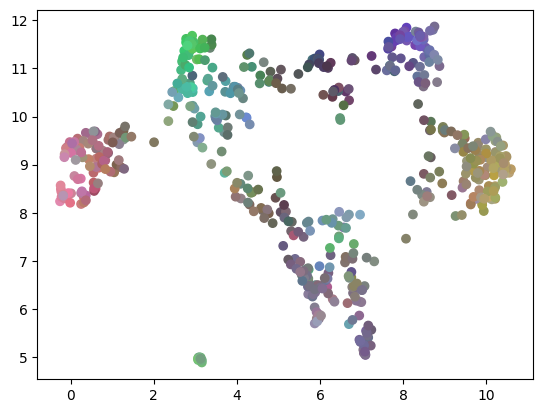

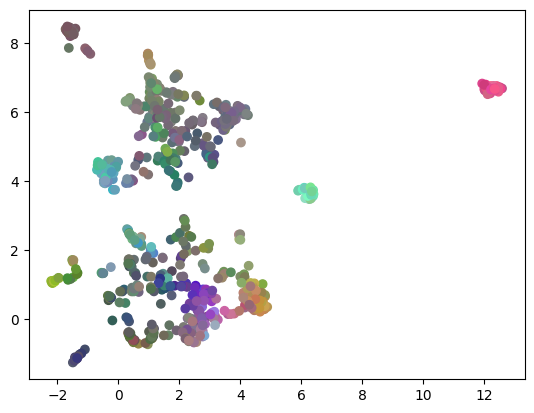

In [9]:
# UMAP with 2 components
umap_reducer2 = umap.UMAP(n_components=2)
memory_embeddings_umap2 = umap_reducer2.fit_transform(memory_embeddings)

# Plot memory embeddings with UMAP
plt.scatter(memory_embeddings_umap2[:, 0], memory_embeddings_umap2[:, 1], c=memory_embeddings_pca5[:, 2:5])
plt.show()

brain_embeddings_umap2 = umap_reducer2.fit_transform(brain_embeddings)

# Plot brain embeddings with UMAP
plt.scatter(brain_embeddings_umap2[:, 0], brain_embeddings_umap2[:, 1], c=brain_embeddings_pca5[:, 2:5])
plt.show()



In [10]:
# Adds all the reduced embeddings to memory_df and brain_df and saves them back to ./sample_data
# Each column is a different dimensionality reduction technique (pca5, pca3, tsne2, umap5, umap2), each entry is an array
memory_df['pca5'] = memory_embeddings_pca5.tolist()
memory_df['tsne2'] = memory_embeddings_tsne2.tolist()
memory_df['umap5'] = memory_embeddings_umap5.tolist()
memory_df['umap2'] = memory_embeddings_umap2.tolist()

brain_df['pca5'] = brain_embeddings_pca5.tolist()
brain_df['tsne2'] = brain_embeddings_tsne2.tolist()
brain_df['umap5'] = brain_embeddings_umap5.tolist()
brain_df['umap2'] = brain_embeddings_umap2.tolist()

memory_df.to_csv('./sample_data/cohere_memory_embeddings.csv')
brain_df.to_csv('./sample_data/cohere_2ndbrain_embeddings.csv')

In [11]:
embeddings_df = pd.read_csv('./sample_data/cohere_memory_embeddings.csv')

embeddings = embeddings_df['embedding'].apply(lambda x: eval(x))
embeddings = np.array([np.array(x) for x in embeddings])

pca5 = embeddings_df['pca5'].apply(lambda x: eval(x))
pca5 = np.array([np.array(x) for x in pca5])

umap2 = embeddings_df['umap2'].apply(lambda x: eval(x))
umap2 = np.array([np.array(x) for x in umap2])

umap5 = embeddings_df['umap5'].apply(lambda x: eval(x))
umap5 = np.array([np.array(x) for x in umap5])

tsne2 = embeddings_df['tsne2'].apply(lambda x: eval(x))
tsne2 = np.array([np.array(x) for x in tsne2])

# stores as npz file
np.savez('./sample_data/cohere_memory_embeddings.npz', embeddings=embeddings, pca5=pca5, umap2=umap2, umap5=umap5, tsne2=tsne2)